# Converting Gaia LMC stars to a file for Uniview

*Aaron Geller 2018*

*The LMC.csv file comes Prof. dr. Amina Helmi's website [here](https://www.astro.rug.nl/~ahelmi/research/dr2-dggc/).  The csv file can be directly downloaded from [this link](https://www.astro.rug.nl/~ahelmi/research/dr2-dggc/tables/objects/LMC.csv) or [this link](https://drive.google.com/file/d/1ZQqOdd77YxqHH_hsfWR81CA0exIQaJe6/view?usp=sharing); note it is 500 MB in size.*

*This table has ID, RA, Dec, g mag.  (No parallax or temperature.) The simplest thing to do will be to take this file, give some random distances (within some range around the LMC distance), and maybe also random Teff.*

In [3]:
import pandas as pd
import numpy as np
from astropy import units, constants
from astropy.coordinates import SkyCoord


In [4]:
LMC = pd.read_csv('LMC.csv')
LMC

,source_id,ra,dec,phot_g_mean_mag
0,4624065110608280192,81.008955,-76.983075,19.425710
1,4624065110608283264,80.991536,-76.975692,19.011436
2,4624065248047231744,80.840810,-76.987044,19.082436
3,4624065351126454528,80.842781,-76.967997,19.736437
4,4624065660364094976,80.668002,-76.979080,19.441092
5,4624065729083567744,80.596253,-76.989924,18.034466
6,4624065836457908480,80.637956,-76.984305,17.908667
7,4624065900882265472,80.519684,-76.973520,19.178217
8,4624065900882266240,80.568290,-76.974252,18.987090
9,4624065935242006912,80.555144,-76.966256,18.454230


*Let's just select "Nstars" of these*

In [7]:
Nstars = 10000
s = LMC.sample(Nstars)

*Random distances*

In [62]:
LMCd = 50*units.kpc
thick = 1*units.kpc #some guess at the thickness
dist = np.random.normal(loc=LMCd.to(units.pc).value, scale=thick.to(units.pc).value, size=Nstars) * units.pc
coord = SkyCoord(s['ra'].values*units.deg, s['dec'].values*units.deg, dist)
print(coord.cartesian[0:10])

[( 267.23407229, 18874.78467902, -47853.52553334),
 (5820.51731403, 17452.07520384, -46382.97598904),
 (3548.41666351, 12924.22094702, -48200.54814107),
 ( 812.60058857, 18765.8776743 , -47271.27392102),
 ( 459.8734779 , 19049.44650756, -46797.43450503),
 (3617.3186296 , 16789.53736228, -46056.37915015),
 (1350.00603522, 18028.19877365, -45775.33588909),
 (2748.04845493, 23442.22502107, -46032.8026288 ),
 (-485.95807618, 19527.61498223, -45476.41224291),
 (3172.52397701, 18515.85156972, -45296.34594464)] pc


*Write to the "raw" file.*

In [4]:
import csv

### Center of LMC  

*From the [wikipedia page](https://en.wikipedia.org/wiki/Large_Magellanic_Cloud)*

In [5]:
RA = "05h 23m 34.5s" #right ascension
Dec= "−69d 45m 22s" #declination
dist = (50 *units.kpc).to(units.pc) #distance

LMCcenter = SkyCoord(RA, Dec, dist)

print(LMCcenter.cartesian)

(2738.1323679, 17082.79901096, -46911.41235443) pc


## SN1987a position 

*From the [wikipedia page](https://en.wikipedia.org/wiki/SN_1987A)*

In [8]:
RA = "05h 35m 28.03s" #right ascension
Dec= "−69d 16m 11.79s" #declination
dist = (51.4 *units.kpc).to(units.pc) #distance

SNcenter = SkyCoord(RA, Dec, dist)

print(SNcenter.cartesian)

(1943.83535919, 18089.69093062, -48072.2850105) pc


*Will use SN1987a position.*

In [26]:
csvfile = open("LMC.raw", 'wt')	
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for i in range(len(coord)):
    x = (coord[i].cartesian.x - SNcenter.cartesian.x).to(units.pc).value
    y = (coord[i].cartesian.y - SNcenter.cartesian.y).to(units.pc).value
    z = (coord[i].cartesian.z - SNcenter.cartesian.z).to(units.pc).value
    csvwriter.writerow([x,y,z, i, 2., 3., 4., 5., 6.])
csvfile.close()

*Testing*

In [68]:
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('LMC.raw', sep=' ', header=None, names=['x','y','z','f1','f2','f3','f4','f5','f6'])

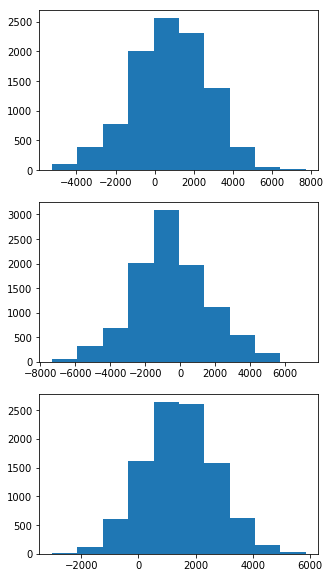

In [25]:
f,(ax1, ax2, ax3) = plt.subplots(3,1, figsize=(5,10))
N, bins, patches = ax1.hist(df['x'])
N, bins, patches = ax2.hist(df['y'])
N, bins, patches = ax3.hist(df['z'])

### Trying to get parallax and Teff

*I followed the steps [here](https://www.gaia.ac.uk/data/gaia-data-release-1/adql-cookbook), with the instructions starting with "I have a list of N members ...", on how to upload a table to the Gaia archive to search by IDs. ... And I ran out of storage space on their server before it completed.  (Are there really 8 million LMC members in Gaia??)*

*Attempt to match these 10k to Gaia for Teff and parallax*

In [57]:
from astroquery.gaia import Gaia
from astropy.table import Table, vstack

In [73]:
i = 0
rad = (0.001*units.arcsec).to(units.degree).value #degrees
fromGaia = []

for i in range(50):
    cmd = f"SELECT TOP 1 \
    ra, dec, parallax, teff_val, phot_g_mean_mag \
    FROM gaiadr2.gaia_source \
    WHERE CONTAINS(POINT('ICRS', ra, dec), \
    CIRCLE('ICRS', {s['ra'].values[i]}, {s['dec'].values[i]}, {rad})) = 1 "

    job = Gaia.launch_job(cmd, dump_to_file=False)
    r = job.get_results()
    print(i, s['ra'].values[i], s['dec'].values[i], s['phot_g_mean_mag'].values[i], r['parallax'][0])
    
    fromGaia.append(r)
    
s1 = vstack(fromGaia)
print(s1)

0 89.18884576538652 -68.47236069044538 18.985256 0.06809237321559701
1 71.5557179440088 -68.36500094159611 16.054370000000002 -0.07367394942601306
2 74.6474258483257 -74.46104825451118 19.27582 0.35285537382431975
3 87.52052541736387 -68.3293684490534 16.96107 0.06856389781700283
4 88.61708881851195 -67.84481167017005 19.62135 0.061557070323831675
5 77.84143641532654 -69.54910991324645 18.191132999999997 0.127393478579584
6 85.71751149088507 -68.44877717016674 17.564426 -0.0842211282684034
7 83.31393534197038 -62.854081133733644 19.398909 0.04629947420111066
8 91.4255504922275 -66.75483720378 18.906162 -0.047032116567922735
9 80.2772973940025 -67.47483063672841 19.055770000000003 -0.16820312447917504
10 82.44042449663294 -70.24931609134336 18.977512 -0.30811983743148164
11 82.78450965642608 -69.18726982035298 19.348064 -0.009158427371227908
12 81.23832326988598 -69.62437847391128 17.580004000000002 0.12770216523971206
13 75.48438182039109 -75.33270677234697 16.690575 0.4752835251258386

In [74]:
dist = np.abs((s1['parallax']).to(units.parsec, equivalencies=units.parallax()))
coord = SkyCoord(s1['ra'], s1['dec'], dist)

print(coord.cartesian)

[( 7.62912513e+01,  5388.46311489,  -13661.45159474),
 ( 1.58329724e+03,  4747.31384546,  -12617.09805481),
 ( 2.01008501e+02,   732.12323383,   -2730.43468709),
 ( 2.32997109e+02,  5380.74339702,  -13554.10066259),
 ( 1.47851973e+02,  6124.50679932,  -15045.64480144),
 ( 5.77665456e+02,  2681.19476241,   -7354.94492125),
 ( 3.25692589e+02,  4349.35146571,  -11043.42295878),
 ( 1.14735143e+03,  9787.48037813,  -19219.3851938 ),
 (-2.08761625e+02,  8388.82371335,  -19536.10851959),
 ( 3.84630712e+02,  2244.82626926,   -5491.64195312),
 ( 1.44284097e+02,  1087.20973641,   -3054.56470932),
 ( 4.87289312e+03, 38489.23263831, -102064.11172009),
 ( 4.15305555e+02,  2694.6309358 ,   -7340.75428508),
 ( 1.33529720e+02,   515.74111712,   -2035.44284503),
 ( 1.42776747e+03,  9184.75375513,  -29575.19609179),
 ( 2.49617292e+02,  1516.12433821,   -4265.02552335),
 ( 1.63650821e+03,  6044.92212795,  -16470.30410978),
 ( 1.07697451e+02,   964.12177726,   -2341.28328048),
 ( 5.70277860e+01,   825.535

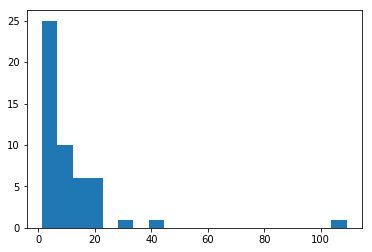

In [75]:
f,ax = plt.subplots()
N, bins, patches = ax.hist(dist.to(units.kpc).value, bins=20)